# Modèle basique pour analyse de l'inventaire

Source : Heijungs, R., Suh, S., 2002. The basic model for inventory analysis, in: Tukker, A. (Ed.), The computational structure of Life Cycle Assessment. Kluver Academic Publisher, London, pp. 11-28.

Hypothèses simplificatrices : 
- Linéarité (on verra de quoi)
- Régime stationnaire de l'économie

Nous pouvons maintenant utiliser les résultats de l'algèbre linéaire. Nous importons le package numpy pour faire du calcul matriciel en python.

In [1]:
import numpy as np

## 1.Représentation des procédés et des flux

Premier exemple de procédé : production d'électricité.
On suppose que produire 10 kWh d'électricité consomme 2 litres d'essence et émet 1 kg de dioxyde de carbone et 0,1 kg de dioxyde de soufre.

![](Images/Process_basic_1.png)


Choix d'une base :\
\
$\begin{pmatrix}
\text{litre d'essence} \\
\text{kWh d'électricité} \\
\text{kg de dioxyde de carbone} \\
\text{kg de dioxyde de soufre}
\end{pmatrix}$




Coordonées du procédé $p_1$ :\
\
$p_1=\begin{pmatrix}
-2 \\
10 \\
1 \\
0.1
\end{pmatrix}$

Convention : valeur négative pour les flux entrants, valeur positive pour les flux sortants

Deuxième exemple de procédé : production d'essence.
On suppose que produire 100l d'essence consomme 50 litres de pétrole et émet 10 kg de dioxyde de carbone et 2 kg de dioxyde de soufre.

![](Images/Process_basic_2.png)


Agrandissement de la base :\
\
$\begin{pmatrix}
\text{litre d'essence} \\
\text{kWh d'électricité} \\
\text{kg de dioxyde de carbone} \\
\text{kg de dioxyde de soufre} \\
\text{litre de pétrole}
\end{pmatrix}$


Nouvelle expression du procédé $p_1$ :

$p_1=\begin{pmatrix}
-2 \\
10 \\
1 \\
0.1\\
0
\end{pmatrix}$

Coordonnées du procédé $p_2$ :

$p_2=\begin{pmatrix}
100 \\
0 \\
10 \\
2\\
-50
\end{pmatrix}$


On définit la matrice des procédés :\
$P =
 \begin{pmatrix}
p_1 \, | \, p_2
\end{pmatrix}
=
\begin{pmatrix}
-2 & 100 \\
10 & 0 \\
1 & 10\\
0.1 & 2\\
0 & -50
\end{pmatrix}$


On sépare la matrice en 2 parties :
- la première représente les flux au sein de la technosphère : ce sont les flux économiques ou intermédiaires ;
- la seconde représente les flux de/vers la biosphère : ce sont les flux environnementaux ou élémentaires (ou interventions).

$P =
 \begin{pmatrix}
A\\ \hline
B
\end{pmatrix}
=
\begin{pmatrix}
-2 & 100 \\
10 & 0 \\\hline
1 & 10\\ 
0.1 & 2\\
0 & -50
\end{pmatrix}$

On appelle A la matrice technologique et B la matrice d'intervention.


### **EXERCICE 1**

Adélaïde souhaite passer ses vacances à Athènes (à 2942 km par la route). Elle refuse de prendre l'avion.
Elle dispose d'une voiture hybride dont le moteur thermique est malencontreusement cassé. Sa voiture consomme donc comme une voiture électrique : 17 kWh d'électricité pour 100 km.

Définir une unité fonctionnelle, un flux de référence et le vecteur de demande finale associé.
A la main, calculer l'inventaire, c'est-à-dire l'ensemble des extractions depuis la biosphère et des émissions vers la biosphère.



#### Correction

Exemple d'unité fonctionnelle : "Faire rouler la voiture hybride d'Adélaïde sur 5884 km".\
Exemple de flux de référence répondant à la demande : "$1000 kWh$ d'électricité".

Vecteur de demande finale associé: $f=\begin{pmatrix}
0\\
1000
\end{pmatrix}$

On peut maintenant réaliser l'inventaire :

1. On identifie, pour chaque procédé, les flux élémentaires (en rouge) et intermédiaires (en bleu).

![](Images/Colored_process_basic_1.png)
![](Images/Colored_process_basic_2.png)

2. On part du vecteur de demande finale et, tel un saumon, on remonte le courant. On multiplie le procédé $p_1$  par un facteur *ad hoc* pour satisfaire la demande. On multiplie le procédé $p_2$  par un autre facteur pour satisfaire les entrants requis par $p_1$. 

![t](Images/Correc_3.png)

3. L'inventaire est :\
$g=\begin{pmatrix}
120\\
1\\
-100
\end{pmatrix}$

## 2.Problème de l'inventaire et méthode de résolution

![](Images/eq_bilan.png)

Le problème s'écrit sous forme matricielle :

$ 
Ps =\begin{pmatrix}
f\\ \hline
g
\end{pmatrix}
$

ou

$
\begin{pmatrix}
A\\ \hline
B
\end{pmatrix}s =
\begin{pmatrix}
f\\ \hline
g
\end{pmatrix}$

soit 

$\begin{cases}
As &=& f \\
Bs &=& g
\end{cases}
$

La méthode de résolution est la suivante :

1. On calcule le vecteur de mise à l'échelle $s$.
2. On en déduit l'inventaire des flux élémentaires $g$.

### Exemple en python

On définit la matrice technologique $A$ et le vecteur de demande finale $f$:

In [2]:
A = np.matrix([[-2., 100.],[10., 0.]]) 
print('Matrice technologique A\n', A)
f = np.matrix([[0.],[1000.]])
print('Vecteur de demande finale f \n', f)

Matrice technologique A
 [[ -2. 100.]
 [ 10.   0.]]
Vecteur de demande finale f 
 [[   0.]
 [1000.]]


On vérifie que $A$ est inversible :

In [3]:
np.linalg.det(A)

-1000.0000000000007

On calcule le vecteur $s=A^{-1}f$:

In [4]:
s= A.getI()*f
print("Vecteur de mise à l'échelle s\n",s)

Vecteur de mise à l'échelle s
 [[100.]
 [  2.]]


Maintenant on définit la matrice environnementale $B$ :

In [5]:
B = np.matrix([[1., 10.],[0.1, 2.],[0, -50]]) 
print('Matrice environnementale B\n', B)

Matrice environnementale B
 [[  1.   10. ]
 [  0.1   2. ]
 [  0.  -50. ]]


Finalement, on déduit l'inventaire $g$ :

In [6]:
g= B*s
print("Inventaire g\n",g)

Inventaire g
 [[ 120.]
 [  14.]
 [-100.]]


### **EXERCICE 2**

Même unité fonctionnelle : "Faire rouler la voiture hybride d'Adélaïde sur 5884 km".\
Après réparation, la voiture consomme désormais 400 litres d'essence et 500 kWh pour faire cette distance.

Calculer l'inventaire. La réparation a-t-elle amélioré les choses ?

#### Correction

In [7]:
f = np.matrix([[400.],[500.]])
g= B*A.getI()*f
print("Inventaire g\n",g)

Inventaire g
 [[ 100.]
 [  15.]
 [-250.]]


## 3.Caractérisation de l'inventaire

Nous n'avons pas encore calculé d'impacts environnementaux ! Pour l'instant, nous avons fait de l'économie ($f$, $A$) et de la comptabilité de flux ($B$) pour aboutir à l'inventaire ($g$). Quels sont les impacts environnementaux causés par les extractions et émissions $g$ ?

Nous devons maintenant utiliser des modèles de physique, chimie, toxicologie, écologie, médecine, etc. pour caractériser les effets de ces flux élémentaires sur l'environnement. Heureusement, Adélaïde s'y connait dans tous ces domaines et nous propose sa méthode de caractérisation des impacts.

### Méthode de caractérisation des impacts "Feraille Impact Assessment" (FIA)

Il est bien connu qu'il y a quatre catégories d'impacts environnementaux :
- la perte de biodiversité ;
- le changement d'usage des sols ;
- la santé humaine ;
- l'épuisement des ressources.

Pour chacune de ces catégories, la méthode associe un indicateur :
- $h_1$ : le nombre de chatons décédés ;
- $h_2$ : le nombre de vaches au mètre carré ;
- $h_3$ : le taux d'E. Coli dans la Seine (en nb/ml) ;
- $h_4$ : la consommation de terres rares (en iphone-équivalent).


Pour chaque impact, on peut déterminer la contribution de chacun des flux élémentaires. La méthode fait l'hypothèse que $h_i$ dépend linéairement de $g$, c'est-à-dire qu'on peut définir une matrice de caractérisation $C$ telle que :

$h=Cg$


Par exemple, on sait que seul le dioxyde de soufre tue les chatons, à raison de 20 chatons par kilogramme de $\text{SO}_2$. 
On peut écrire : 

$h_1 = 0 \times g_1 + 20 \times g_2 + 0 \times g_3$.

En revanche, pour le nombre de vaches au mètre carré ($v.m^{-2}$), 1 kg de $\text{CO}_2$ diminue $h_2$ de 3 $v.m^{-2}$, 1 kg de $\text{SO}_2$ augmente $h_2$ de 0.5 $v.m^{-2}$ et 1 l de pétrole diminue $h_2$ de 50 $v.m^{-2}$ : 

 $h_2 = -3 \times g_1 + 0.5 \times g_2  -50 \times g_3$. 
 
 Ainsi :


$C =
\begin{pmatrix}
0 & 20 & 0 \\
-3 & 0.5 & -50 \\
200 & 4 & 8 \\
1 & 1 & -500 \\
\end{pmatrix}$


### EXERCICE 3

Avec les mêmes données qu'aux exercices précédents, calculer les scores d'impacts avant et après réparation. 

La réparation a-t-elle amélioré les choses ?

### Correction

On définit la matrice de caractérisation $C$ :

In [8]:
C = np.matrix([[0., 20.,0],[-3., 0.5,-50.],[200.,4.,8.],[1.,1.,-500.]]) 
print('Matrice de caractérisation C\n', C)

Matrice de caractérisation C
 [[   0.    20.     0. ]
 [  -3.     0.5  -50. ]
 [ 200.     4.     8. ]
 [   1.     1.  -500. ]]


Les vecteurs de demandes finales à comparer (NB : au fait, quel est le flux de référence du vecteur "avec réparation" ?) :

In [9]:
f_sans_rep = np.matrix([[0.],[1000.]])
f_avec_rep = np.matrix([[400.],[500.]])

On calcule les vecteurs d'impacts environnementaux avec et sans réparation :

In [10]:
h_sans_rep = C*B*A.getI()*f_sans_rep
h_avec_rep = C*B*A.getI()*f_avec_rep
print('Vecteur impacts environnementaux (sans réparation)\n', h_sans_rep)
print('Vecteur impacts environnementaux (avec réparation)\n', h_avec_rep)

Vecteur impacts environnementaux (sans réparation)
 [[  280.]
 [ 4647.]
 [23256.]
 [50134.]]
Vecteur impacts environnementaux (avec réparation)
 [[   300. ]
 [ 12207.5]
 [ 18060. ]
 [125115. ]]


Visualisons les résultats.

a) Exemple d'un mauvais graphe :

In [11]:
import pandas as pd # package introduisant un format "DataFrame", qui est aux matrices ce que le dictionnaire est aux listes
import seaborn as sns # librairie de visualisation de données basée sur matplotlib, qui fonctionnement bien avec les dataframes

#Création d'un dataframe contenant toutes les données à tracer
df = pd.DataFrame()
df['indicateurs'] = ['Chatons','Vaches','E. Coli','Terres rares']*2
df['valeurs'] = [hi[0,0] for hi in h_sans_rep]+[hi[0,0] for hi in h_avec_rep]
df['réparation'] = ['Sans réparation']*4+['Avec réparation']*4

df

,indicateurs,valeurs,réparation
0,Chatons,280.0,Sans réparation
1,Vaches,4647.0,Sans réparation
2,E. Coli,23256.0,Sans réparation
3,Terres rares,50134.0,Sans réparation
4,Chatons,300.0,Avec réparation
5,Vaches,12207.5,Avec réparation
6,E. Coli,18060.0,Avec réparation
7,Terres rares,125115.0,Avec réparation


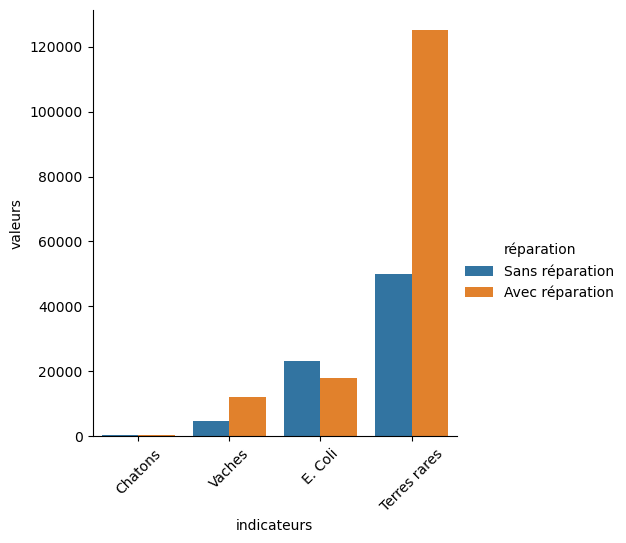

In [12]:
g=sns.catplot(data=df,x='indicateurs',y='valeurs',hue='réparation',kind='bar')
g.set_xticklabels(rotation = 45)

b) Exemple d'un moins mauvais graphe :

On normalise par le maximum pour chaque indicateur pour s'affranchir des unités différentes.

In [13]:
h_max=[max(h_avec_rep[i,0],h_sans_rep[i,0]) for i in range(len(h_sans_rep))] # vecteur des maximums pour chaque indicateur
    
df['max']=h_max*2 #ajout d'une colonne avec les maximums pour chaque indicateur
df['valeurs_norm'] = df['valeurs']/df['max'] # création d'une colonne de valeurs normalisées par le max
display(df)

,indicateurs,valeurs,réparation,max,valeurs_norm
0,Chatons,280.0,Sans réparation,300.0,0.933333
1,Vaches,4647.0,Sans réparation,12207.5,0.380668
2,E. Coli,23256.0,Sans réparation,23256.0,1.000000
3,Terres rares,50134.0,Sans réparation,125115.0,0.400703
4,Chatons,300.0,Avec réparation,300.0,1.000000
5,Vaches,12207.5,Avec réparation,12207.5,1.000000
6,E. Coli,18060.0,Avec réparation,23256.0,0.776574
7,Terres rares,125115.0,Avec réparation,125115.0,1.000000


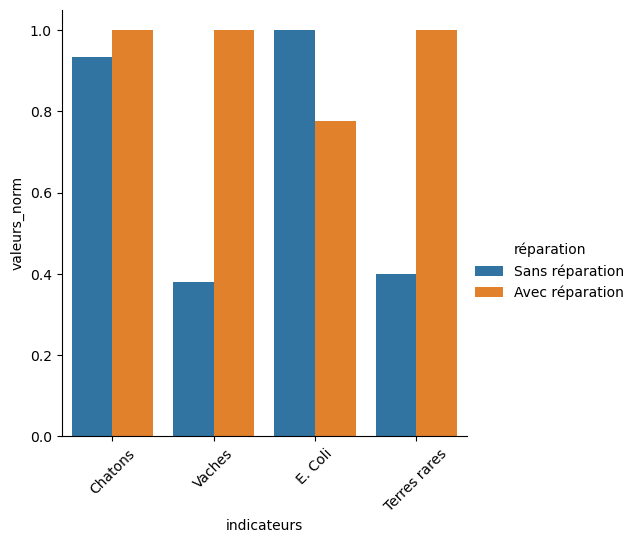

In [14]:
g=sns.catplot(data=df,x='indicateurs',y='valeurs_norm',hue='réparation',kind='bar')
g.set_xticklabels(rotation = 45)

Ce graphe seul répond-il à la question posée ?

## Bilan

Nous avons présenté la structure de calcul d'un modèle basique d'ACV et traité un exemple simple à la main et en python.

En introduction, nous avions dit avoir besoin des hypothèses suivantes : 
- Linéarité ;
- Régime stationnaire de l'économie.

Où ces hypothèses ont-elles été utilisées ?